First off, I'm the realist (the I'm refers to Lawrence, Austin, Joe and Moore, Wang, and Higgins respectively

In [107]:
%matplotlib
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
n = 3

x = np.matrix([[0.5], [0.5], [0.5]])
s = np.matrix([[1], [1], [1]])

Using matplotlib backend: nbAgg


In [127]:
def sigh(rho, x, s):
    log_term = 0
    for index in range(3):
        log_term += np.log(x[index] * s[index])
    return (n + rho) * np.log(np.dot(np.transpose(x), s)) - log_term

In [285]:
def generate_primal():
    x1 = random.uniform(0, .01)
    x2 = random.uniform(0, .01)
    x3 =1 - (x1 + x2)
    return np.matrix([[x1], [x2], [x3]])

In [284]:
def generate_dual():
    y = random.uniform(-.000001, 0)
    return np.matrix([[1 - y], [1 - y], [ -1 * y]])

In [279]:
N = 500

def generate_points(rho, cut_off):
    primal_points = [generate_primal() for _ in range(N)]
    dual_points = [generate_dual() for _ in range(N)]

    points_to_plot = []
    for i in range(N):
        min_val = 12345
        min_primal = None
        for j in range(N):
            psi_val = sigh(rho, primal_points[i], dual_points[j])
            if psi_val < min_val:
                min_val = psi_val
                min_primal = primal_points[i]
                if min_val < cut_off:
                    points_to_plot.append(min_primal)
                    break
        print(i)
    return np.array(points_to_plot)

In [ ]:
points_to_plot_5 = generate_points(3, -10)
print(points_to_plot_5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171

In [275]:
print(sigh(3, np.matrix([[0.0005], [0.0005], [0.99]]), generate_dual()))

[[-4.72488235]]


In [ ]:
for point in points_to_plot_5:
    print(psi(point))

<IPython.core.display.Javascript object>


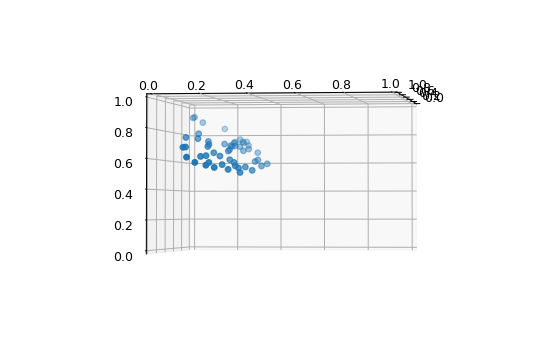

[[ 0.0175515 ]
 [ 0.28565558]
 [ 0.0582593 ]
 [ 0.29484675]
 [ 0.00146564]
 [ 0.31429097]
 [ 0.01822023]
 [ 0.2012067 ]
 [ 0.14750549]
 [ 0.25180569]
 [ 0.06058417]
 [ 0.07619697]
 [ 0.28116274]
 [ 0.24606153]
 [ 0.28306775]
 [ 0.09557267]
 [ 0.05241373]
 [ 0.1729027 ]
 [ 0.09309245]
 [ 0.0211232 ]
 [ 0.15649165]
 [ 0.2949349 ]
 [ 0.16123207]
 [ 0.00842556]
 [ 0.19092538]
 [ 0.34093722]
 [ 0.20147986]
 [ 0.05881121]
 [ 0.06192966]
 [ 0.06902013]
 [ 0.22328451]
 [ 0.20563414]
 [ 0.16818208]
 [ 0.07265069]
 [ 0.13657833]
 [ 0.02584861]
 [ 0.18513506]
 [ 0.09250256]
 [ 0.07159343]
 [ 0.05833781]
 [ 0.18515329]
 [ 0.20170563]
 [ 0.03950524]
 [ 0.25498205]
 [ 0.12265726]
 [ 0.0920083 ]
 [ 0.18156271]
 [ 0.01382989]
 [ 0.34060475]
 [ 0.22212509]
 [ 0.10705014]]
[[ 0.25585382]
 [ 0.11741058]
 [ 0.01310138]
 [ 0.14314501]
 [ 0.24505873]
 [ 0.10870393]
 [ 0.22930518]
 [ 0.2229418 ]
 [ 0.04714854]
 [ 0.19887182]
 [ 0.22234159]
 [ 0.20279652]
 [ 0.07911635]
 [ 0.17076171]
 [ 0.01132625]
 [ 0.3269

In [149]:
fig = plt.figure()
ax = plt.axes(projection='3d')

data = np.array(points_to_plot_5)
data_col_0 = data[:, 0, :]
data_col_1 = data[:, 1, :]
data_col_2 = data[:, 2, :]

print(data_col_0)
print(data_col_1)
print(data_col_2)

ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)
ax.scatter3D(data_col_0, data_col_1, data_col_2)